In [1]:
import sys
import os

# get the parent directory of Examples/
project_root = os.path.abspath(os.path.join(".."))
# add it to Python path
sys.path.append(project_root)

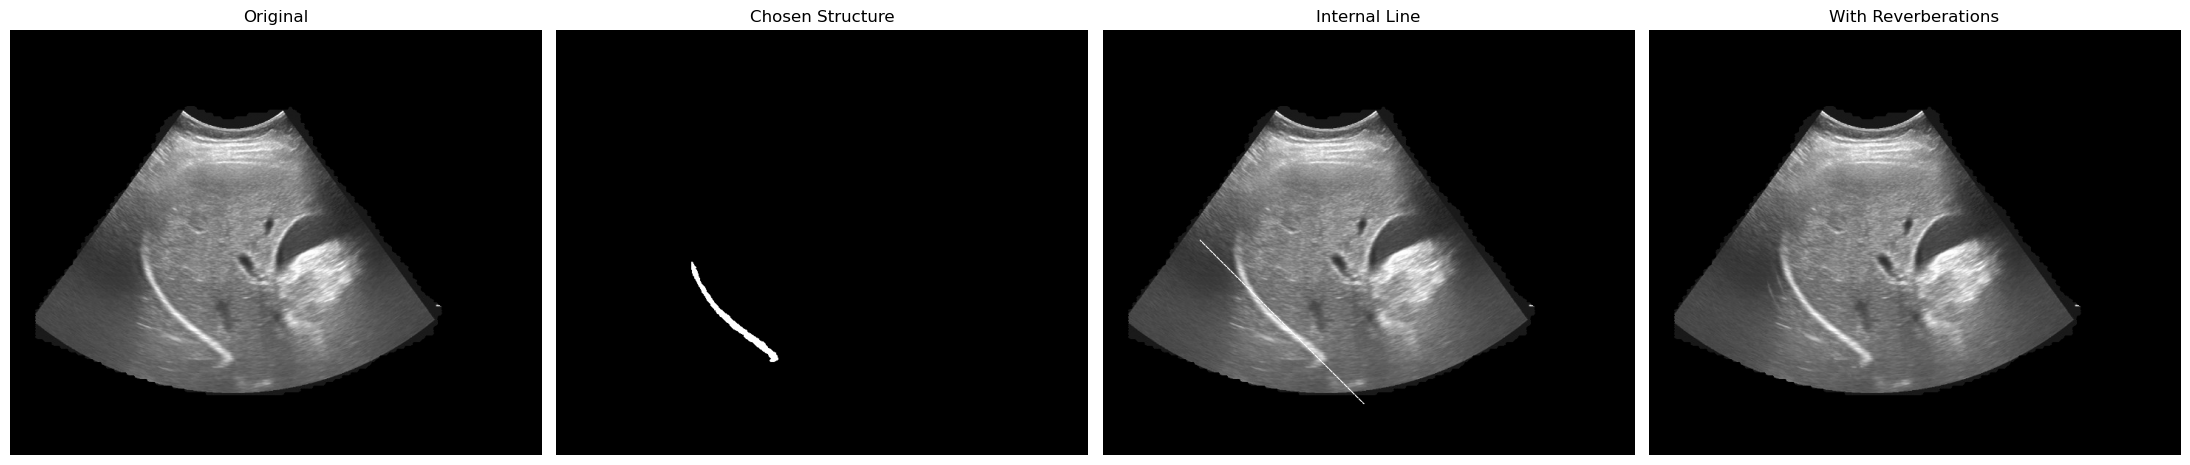

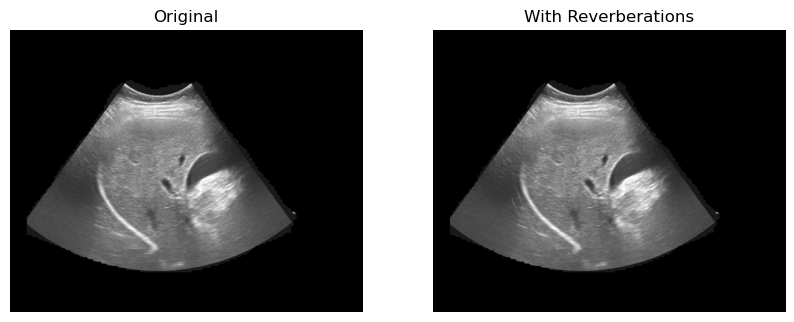

Debug info:
applied : True
structure_idx : 2
line_info : {'angle_deg': 45.0, 'length': 155, 'x0': 297.30035072558667, 'y0': 450.7728849985836, 'x1': 186.28458607929784, 'y1': 339.75712035229475}
n_reverbs : 10
spacing : 17.151587519468293
max_depth_px : 45


In [75]:
import cv2
import matplotlib.pyplot as plt

from UltraPhyx.utils import analyze_ultrasound_scan
from UltraPhyx.add_reverberations import add_reverberations
from UltraPhyx.add_shadow import add_shadow
from UltraPhyx.add_mirror import add_mirror

# ------------------------------------------------------------
# Load an ultrasound image
# ------------------------------------------------------------
img = cv2.imread("example_images/example1.jpg", cv2.IMREAD_GRAYSCALE)

# ------------------------------------------------------------
# Run your geometry + structure analysis
# ------------------------------------------------------------
analysis = analyze_ultrasound_scan(
    img,
    clean_mask_params=dict(
        blur_ksize=7,
        brightness_factor=0.35,
        morph_ksize=15,
        disconnect_threshold=0.05,
    ),
    structure_params=dict(
        threshold_percentile=90.0,
        max_components=3,
        min_rel_area=0.001
    ),
    show_debug=False
)

# ------------------------------------------------------------
# Add reverberations
# ------------------------------------------------------------
reverb_img, dbg = add_reverberations(
    analysis,
    img,
    # geometric & realism controls
    max_depth_fraction=0.30,
    prefer_thin_prob=0.80,
    max_reverbs=15,
    decay_rate=0.2,
    spacing_jitter=0.20,
    base_spacing_px=15.0,
    lateral_feather_px=5,
    strength=1.0,
    intensity_base=0.5,         # baseline multiplier (default 0.9)
    intensity_noise_amp=0.8,    # Nakagami noise amplitude (default 0.7)
    seed=42,
    show_debug=True
)

# ------------------------------------------------------------
# Show results
# ------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("With Reverberations")
plt.imshow(reverb_img, cmap='gray')
plt.axis("off")

plt.show()

print("Debug info:")
for k,v in dbg.items():
    print(k, ":", v)


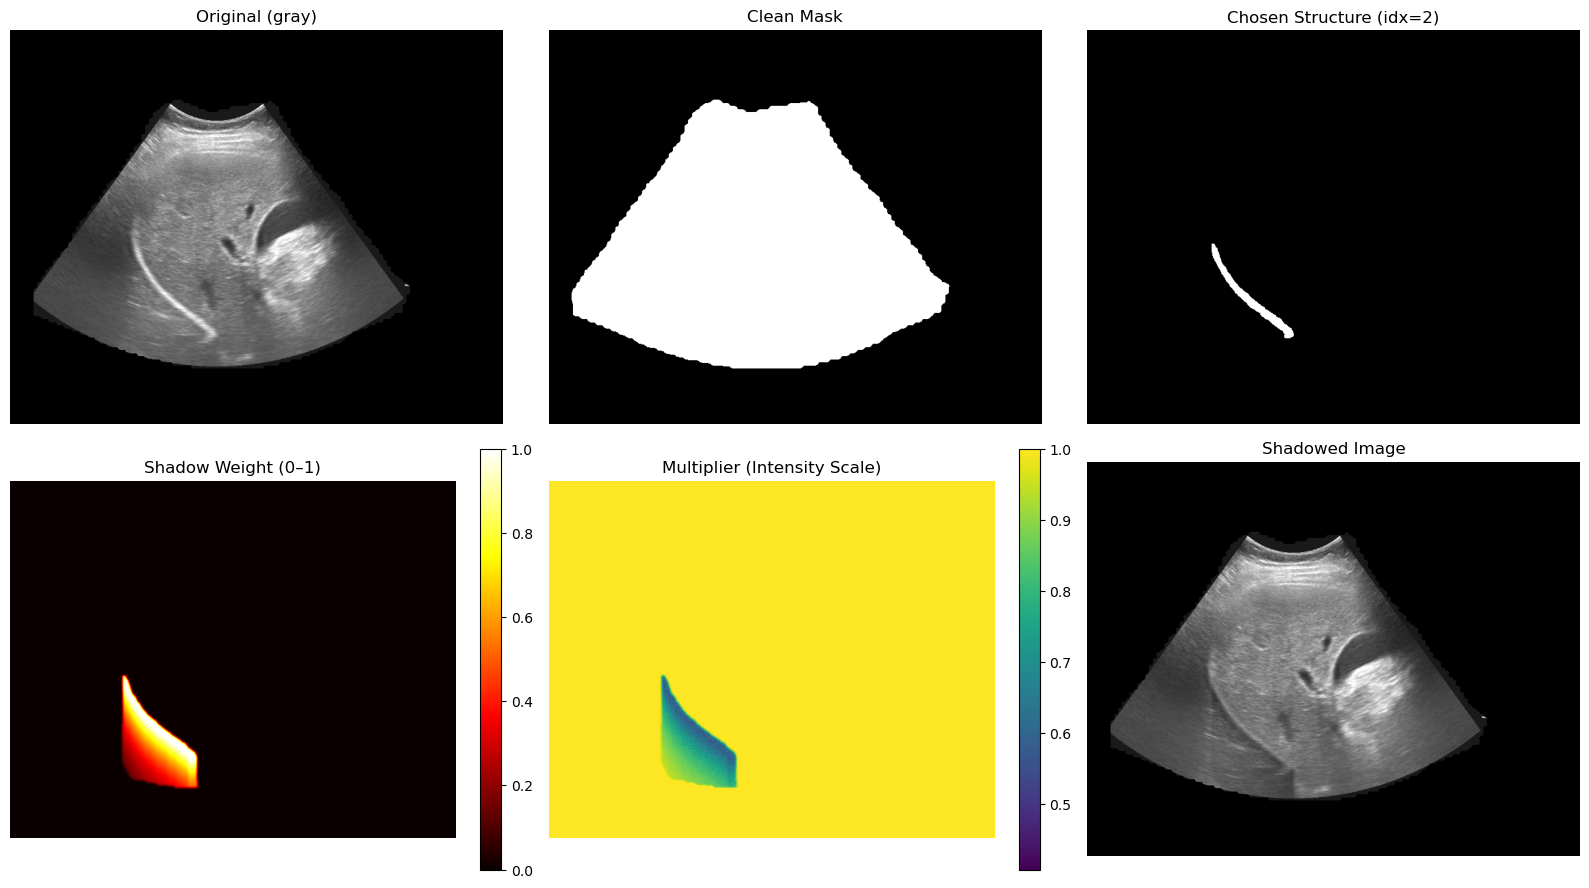

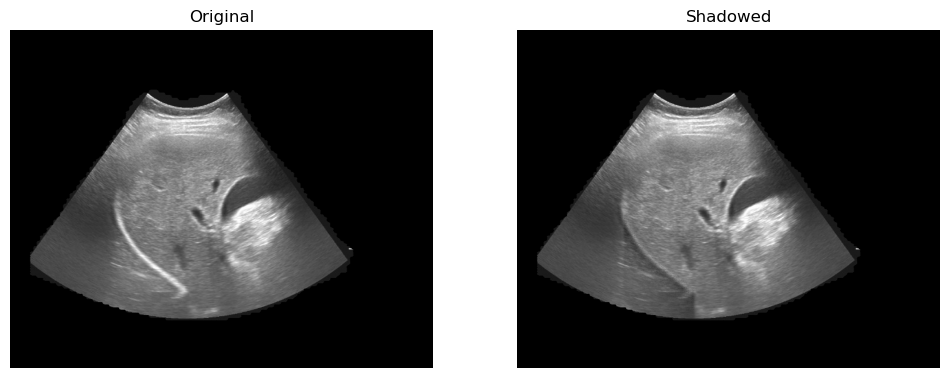

In [51]:
from UltraPhyx.utils import analyze_ultrasound_scan   # your analysis pipeline
from UltraPhyx.add_shadow import add_shadow                  # the code you posted
import cv2
import matplotlib.pyplot as plt

# -------------------------------------------
# Load image
# -------------------------------------------
img = cv2.imread("example_images/example1.jpg", cv2.IMREAD_GRAYSCALE)

# -------------------------------------------
# Run your analysis pipeline
# -------------------------------------------
analysis = analyze_ultrasound_scan(
    img,
    show_debug=False
)

# -------------------------------------------
# Apply one shadow augmentation
# -------------------------------------------
shadowed, info = add_shadow(
    analysis,
    img,
    shadow_strength=0.65,
    decay_rate=2.0,
    max_depth_fraction=0.33,
    structure_dilate_iters=1,
    fan_spread_factor=0.8,
    edge_blur_ksize=9,
    seed=13,
    show_debug=True
)

# -------------------------------------------
# Visualize
# -------------------------------------------
plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.title("Original"); plt.imshow(img, cmap="gray"); plt.axis("off")
plt.subplot(1,2,2); plt.title("Shadowed"); plt.imshow(shadowed, cmap="gray"); plt.axis("off")
plt.show()


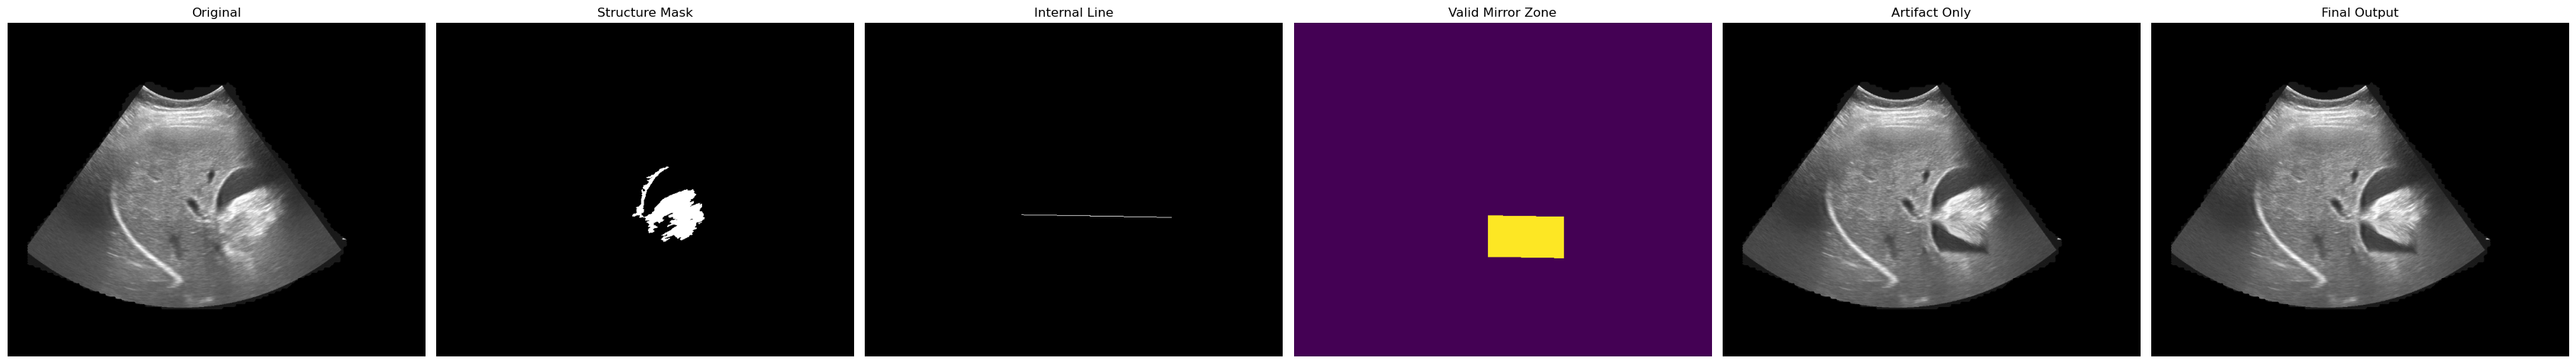

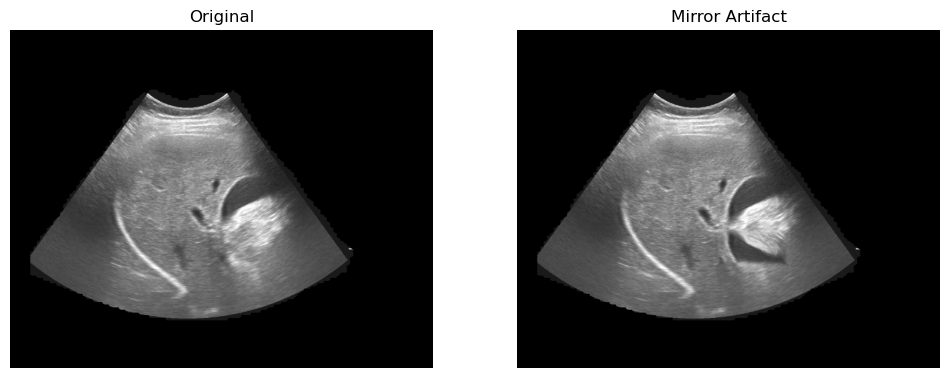

{'applied': True, 'structure_index': 0, 'line_info': {'angle_deg': 1.0, 'length': 127, 'x0': 463.89997706232424, 'y0': 334.8256794854671, 'x1': 334.9196243871481, 'y1': 332.57431905506087}, 'xmin': 334, 'xmax': 464}


In [32]:
import cv2
import matplotlib.pyplot as plt
from UltraPhyx.utils import analyze_ultrasound_scan   # your full pipeline
from UltraPhyx.add_mirror import add_mirror                  # the function you posted

# -------------------------------------------
# Load ultrasound image (grayscale)
# -------------------------------------------
img = cv2.imread("example_images/example1.jpg", cv2.IMREAD_GRAYSCALE)

# -------------------------------------------
# Run your analysis pipeline
# -------------------------------------------
analysis = analyze_ultrasound_scan(
    img,
    show_debug=False
)

# -------------------------------------------
# Apply mirror artifact
# -------------------------------------------
mirrored, info = add_mirror(
    analysis,
    img,
    max_depth_fraction=0.35,
    max_tilt_deg=45,
    mirror_strength=0.85,
    decay_rate=0.1,
    lateral_blur_px=18,
    original_remaining_threshold_percentage=0.05,
    opp_angle_thresh_deg=45,
    seed=4546,
    show_debug=True
)

# -------------------------------------------
# Visualize
# -------------------------------------------
plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(mirrored, cmap="gray"); plt.title("Mirror Artifact"); plt.axis("off")
plt.show()

print(info)


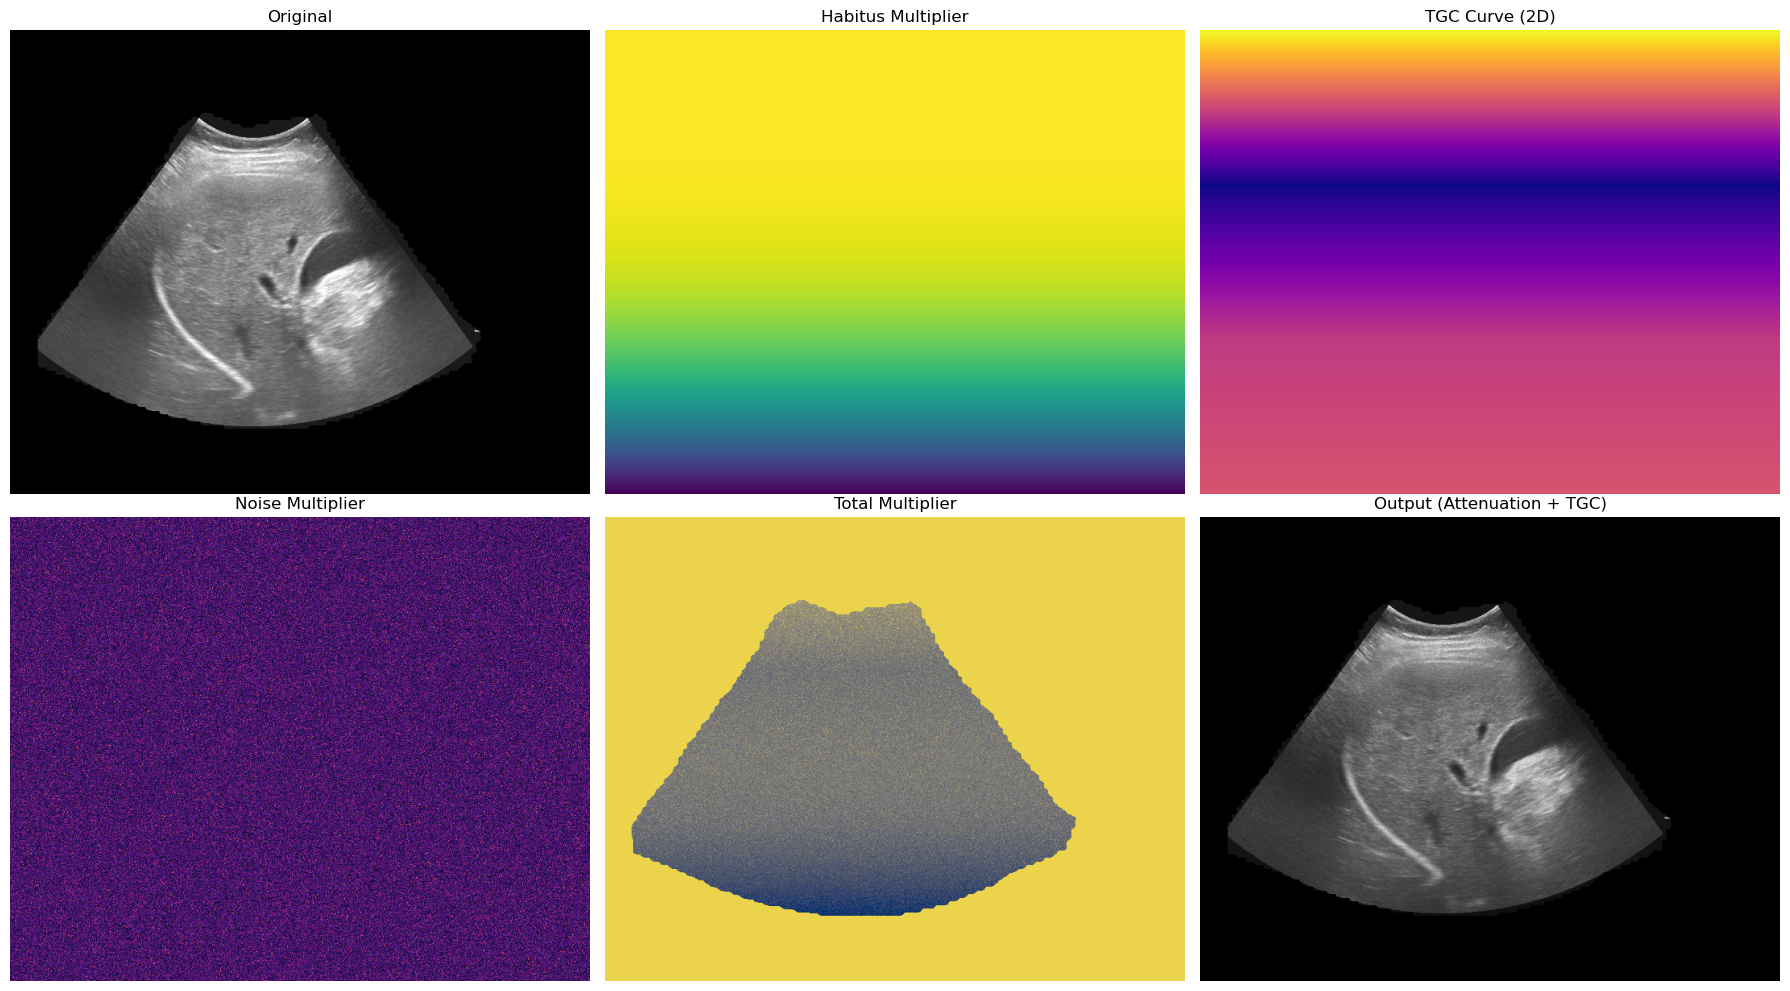

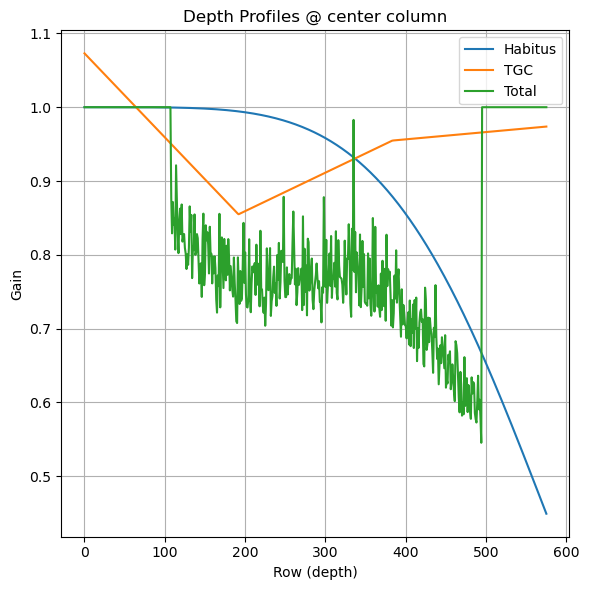

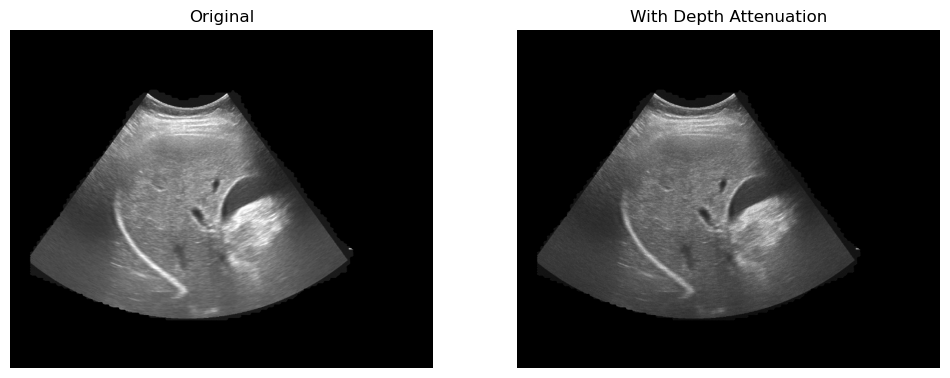

dict_keys(['applied', 'multiplier', 'depth_norm', 'habitus_curve', 'tgc_curve', 'noise'])


In [134]:
import cv2
import matplotlib.pyplot as plt

from UltraPhyx.utils import analyze_ultrasound_scan
from UltraPhyx.add_depth_attenuation import add_depth_attenuation


# ------------------------------------------------------
# 1. Load an ultrasound image
# ------------------------------------------------------
img = cv2.imread("example_images/example1.jpg", cv2.IMREAD_GRAYSCALE)

# ------------------------------------------------------
# 2. Run your unified analysis pipeline
# ------------------------------------------------------
analysis = analyze_ultrasound_scan(
    img,
    show_debug=False
)

# ------------------------------------------------------
# 3. Apply depth attenuation
# ------------------------------------------------------
out, dbg = add_depth_attenuation(
    analysis,
    img,
    strength=1.0,
    curve_shape=4.5,
    habitus_alpha=0.8,
    enable_tgc=True,
    tgc_strength=0.2,
    tgc_rescue=0.1,
    tgc_num_knots=4,
    noise_amplitude=0.2,
    seed=123,
    show_debug=True
)

# ------------------------------------------------------
# 4. Visualize
# ------------------------------------------------------
plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(out, cmap="gray"); plt.title("With Depth Attenuation"); plt.axis("off")
plt.show()

print(dbg.keys())


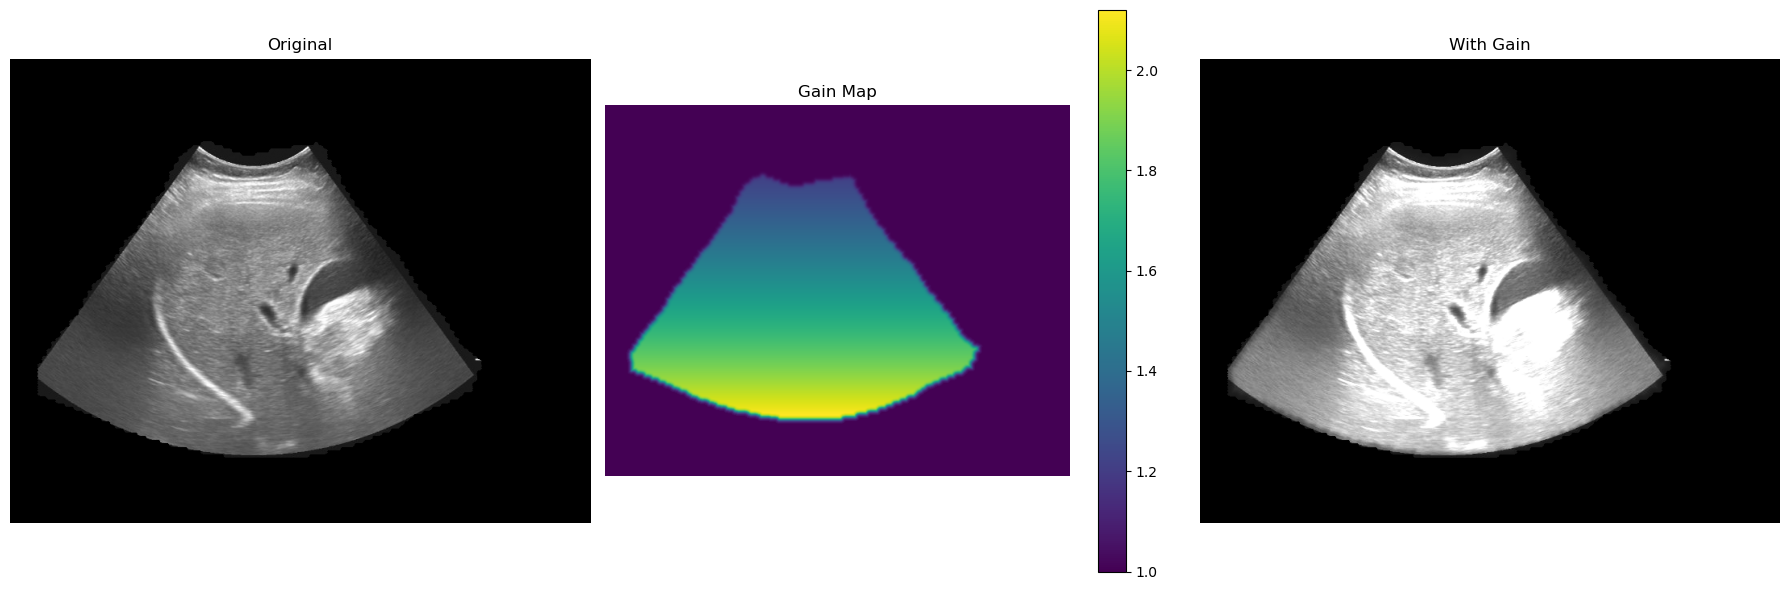

(-0.5, 719.5, 575.5, -0.5)

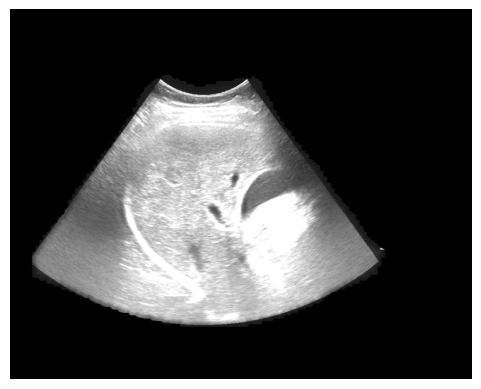

In [102]:
from UltraPhyx.adjust_gain import adjust_gain

analysis = analyze_ultrasound_scan(img)

out, dbg = adjust_gain(
    analysis,
    img,
    gain=1.2,           # +25% brightness
    depth_gain=0.6,     # stronger deeper gain (TGC-ish)
    feather_px=14,
    show_debug=True
)

plt.imshow(out, cmap='gray'); plt.axis("off")


In [118]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from typing import Dict, Any, Optional
from utils import (
    _ensure_uint8,
    _clip_uint8,
    estimate_from_intensity,
    sample_nakagami,
)


def add_speckle_style(
    analysis: Dict[str, Any],
    img: np.ndarray,
    *,
    target_m: Optional[float] = None,         # override shape parameter (e.g., 0.6–1.2)
    target_Omega: Optional[float] = None,     # override scale parameter
    strength: float = 0.5,                    # blending with original speckle
    feather_px: int = 12,                     # blending edge around mask
    seed: Optional[int] = None,
    show_debug: bool = False
):
    """
    Adjust speckle characteristics within clean_mask by modifying the 
    underlying Nakagami distribution.

    Parameters
    ----------
    target_m : float or None
        Desired Nakagami shape parameter (controls speckle granularity).
        - lower m (~0.3–0.6) → coarse, grainy speckle (older machines)
        - higher m (~1.0–1.5) → finer speckle (modern machines)
    target_Omega : float or None
        Scale parameter (controls brightness envelope)
    strength : float in [0,1]
        0   = no change
        1   = full replacement of speckle in clean_mask
    feather_px : int
        Smooth blending around clean_mask edges.
    """

    rng = np.random.default_rng(seed)

    # ---------------------------------------------
    # Preprocessing
    # ---------------------------------------------
    img_u8 = _ensure_uint8(img)
    if img_u8.ndim == 2:
        gray = img_u8.copy()
    else:
        gray = cv2.cvtColor(img_u8, cv2.COLOR_BGR2GRAY)
    H, W = gray.shape

    clean = analysis.get("clean_mask", None)
    if clean is None:
        return gray, {"applied": False, "reason": "no clean_mask"}
    clean_bool = clean.astype(bool)

    # ---------------------------------------------
    # Estimate original speckle parameters inside mask
    # ---------------------------------------------
    region = gray[clean_bool]
    if region.size == 0:
        region = gray

    m_orig, Omega_orig = estimate_from_intensity(region)

    # If user does not specify target values → random small perturbation
    if target_m is None:
        target_m = float(m_orig * rng.uniform(0.7, 1.4))
    if target_Omega is None:
        target_Omega = float(Omega_orig * rng.uniform(0.8, 1.2))

    # ---------------------------------------------
    # Sample new speckle field
    # ---------------------------------------------
    speck = sample_nakagami((H, W), m=target_m, Omega=target_Omega, rng=rng)
    speck -= speck.min()
    speck /= (speck.max() + 1e-8)

    # ---------------------------------------------
    # Normalize original intensities into [0,1]
    # ---------------------------------------------
    gray_norm = gray.astype(np.float32) / 255.0

    # ---------------------------------------------
    # Replace speckle texture while preserving anatomy envelope
    # ---------------------------------------------
    # Anatomy envelope (slow spatial variation)
    envelope = cv2.GaussianBlur(gray_norm, (13,13), 4)

    # Blend between original and generated speckle
    new_texture = (1 - strength) * gray_norm + strength * (envelope * speck)

    # Clip & convert
    new_texture_u8 = _clip_uint8(new_texture * 255.0)

    # ---------------------------------------------
    # Feather mask boundary
    # ---------------------------------------------
    if feather_px > 0:
        mask_uint = clean_bool.astype(np.uint8)
        dist = cv2.distanceTransform(mask_uint, cv2.DIST_L2, 5)
        d = np.clip(dist, 0, feather_px)
        t = d / feather_px
        sharp = 7.0
        alpha = 1.0 / (1.0 + np.exp(-sharp * (t - 0.5)))

        # Only blend inside mask
        out = gray.astype(np.float32)
        out = alpha * new_texture_u8 + (1 - alpha) * out
        out = _clip_uint8(out)
    else:
        out = gray.copy()
        out[clean_bool] = new_texture_u8[clean_bool]

    # ---------------------------------------------
    # Debug
    # ---------------------------------------------
    dbg = dict(
        applied=True,
        original_m=m_orig,
        original_Omega=Omega_orig,
        target_m=target_m,
        target_Omega=target_Omega,
        strength=strength,
    )

    if show_debug:
        fig, ax = plt.subplots(1, 4, figsize=(22,6))
        ax[0].imshow(gray, cmap='gray'); ax[0].set_title("Original"); ax[0].axis("off")
        ax[1].imshow(speck, cmap='gray'); ax[1].set_title("Generated Speckle"); ax[1].axis("off")
        ax[2].imshow(new_texture_u8, cmap='gray'); ax[2].set_title("New Texture (mask only)"); ax[2].axis("off")
        ax[3].imshow(out, cmap='gray'); ax[3].set_title("Final Output"); ax[3].axis("off")
        plt.tight_layout()
        plt.show()

    return out, dbg


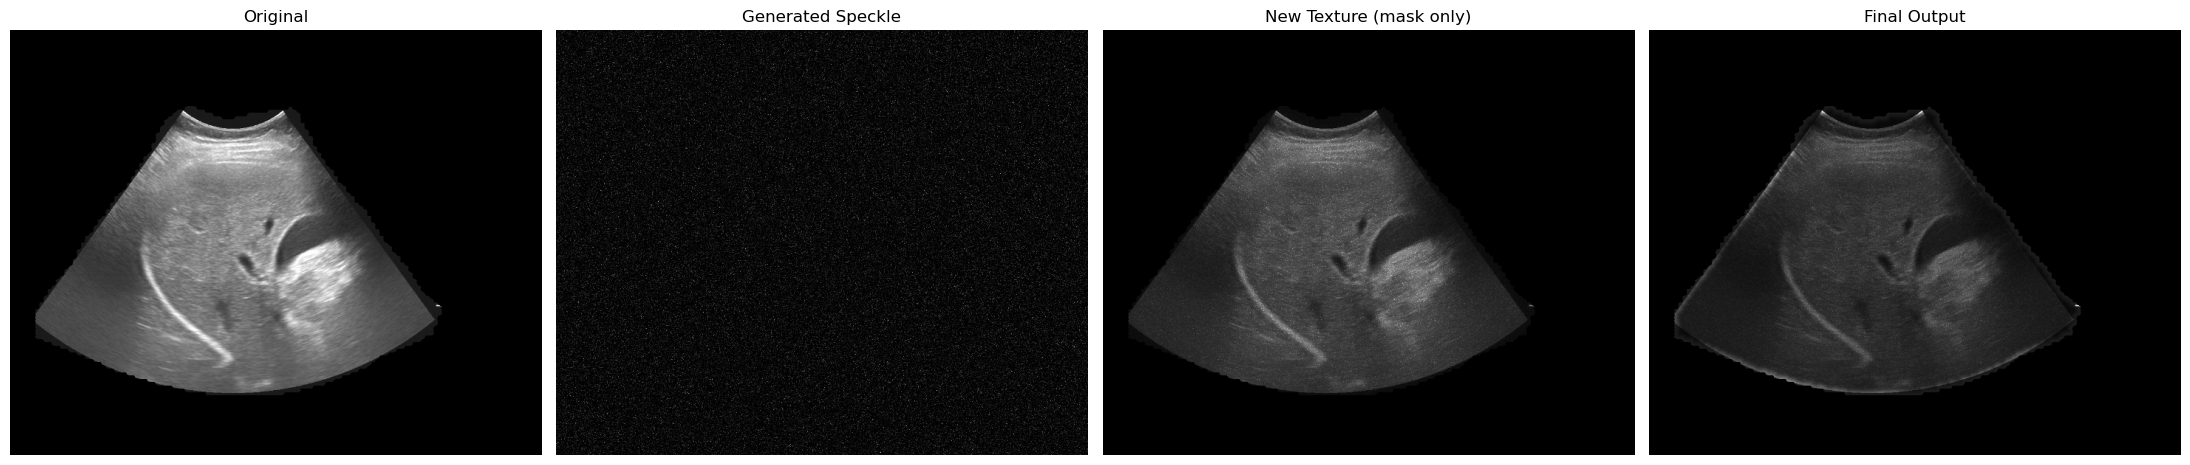

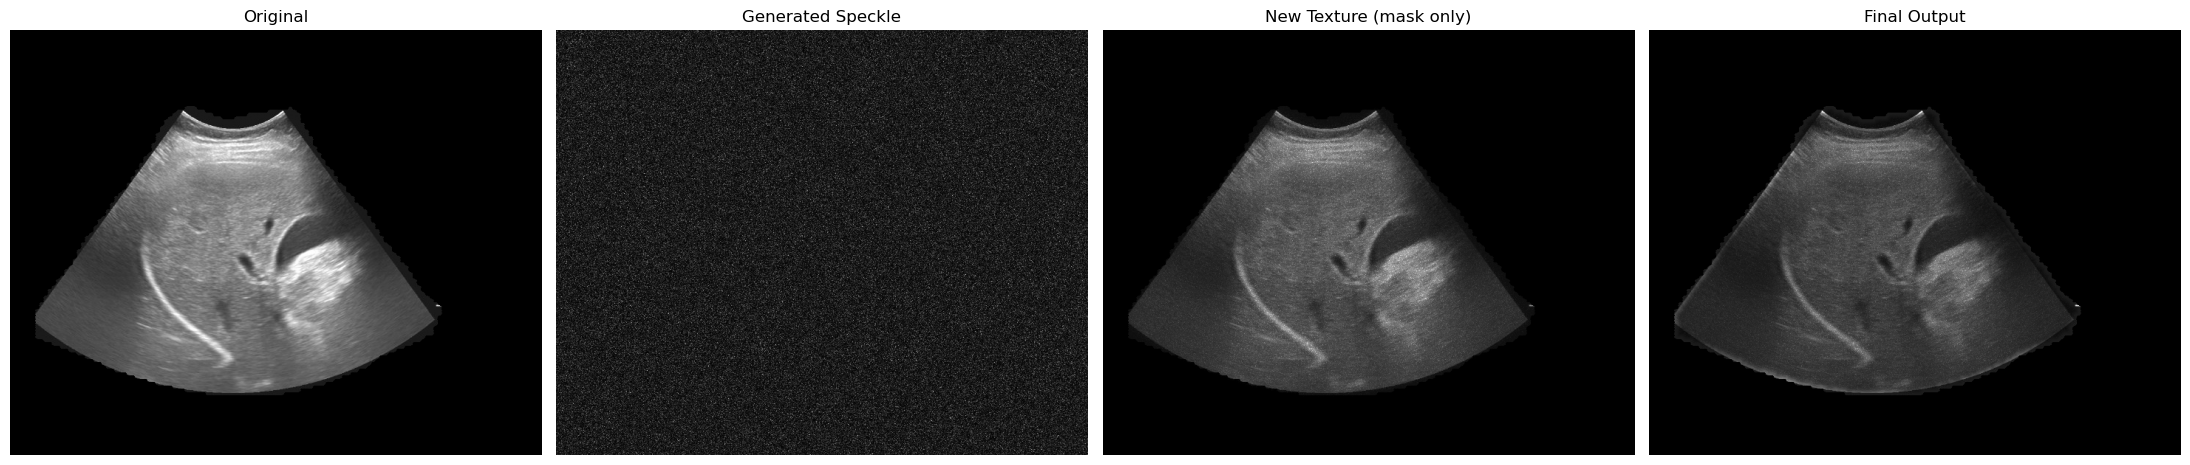

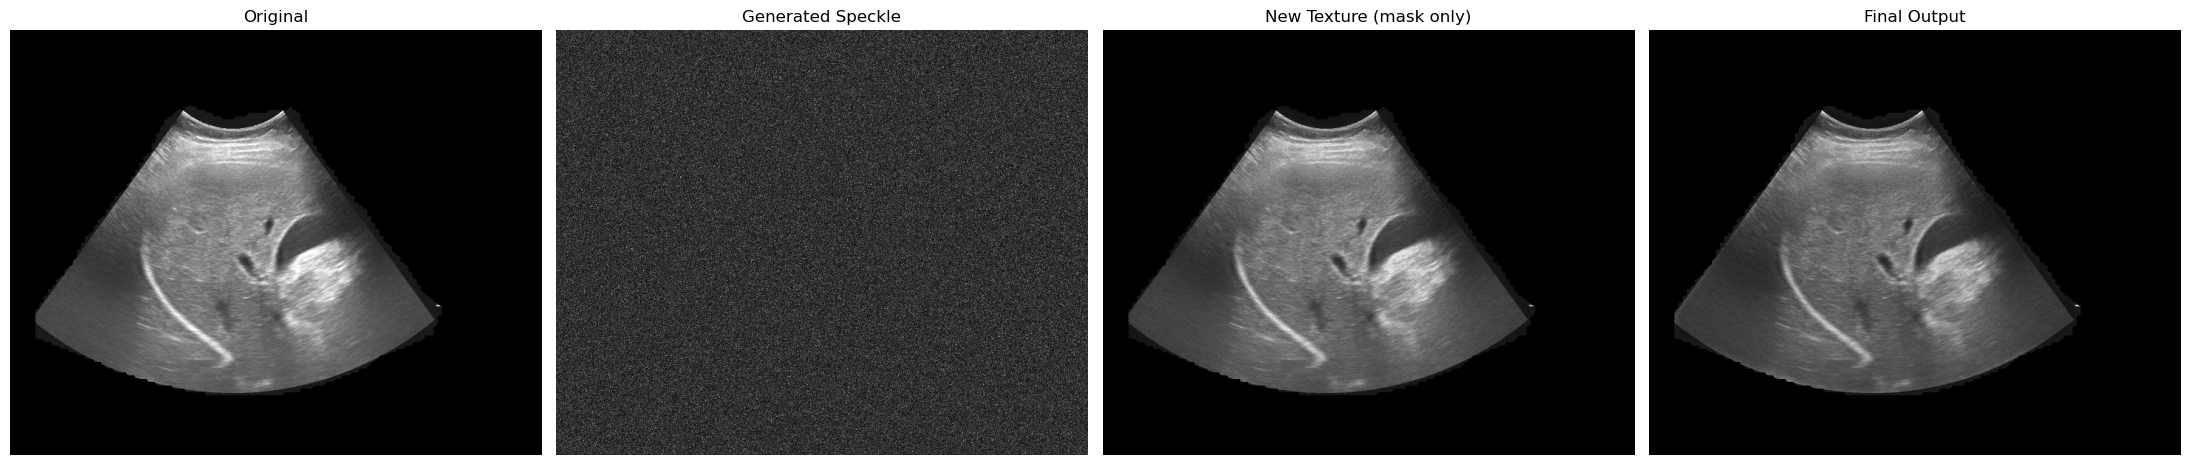

In [127]:
analysis = analyze_ultrasound_scan(img)

# simulate older noisy machine
out1, dbg1 = add_speckle_style(
    analysis,
    img,
    target_m=0.5,
    target_Omega=None,
    strength=0.7,
    show_debug=True
)

# simulate fine modern speckle
out2, dbg2 = add_speckle_style(
    analysis,
    img,
    target_m=1.6,
    strength=0.6,
    show_debug=True
)

# mild random perturbation
out3, dbg3 = add_speckle_style(
    analysis,
    img,
    strength=0.3,
    show_debug=True
)
